This question I want to get from this dataset are:
- Total types of the real estate that exist in the dataset
- Total types of the real estate in specific location

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import json_normalize
import pandas as pd
from pandas import json_normalize
import json
import re
import itertools

In [2]:
def load_data(title):
    with open(title,encoding='utf-8') as f:
        return json.load(f)

In [3]:
realestate_kh = "./realestate_kh_cleaner2023-05-20.json"
realestate_kh_list = load_data(realestate_kh)

In [4]:
df2 = json_normalize(realestate_kh_list) 
df2

,location,price,bedrooms,bathrooms,floors,lands,type
0,Phnom Penh,"$52,000",1,1,35,None,Apartment
1,Phnom Penh,"$290,000",4,5,None,None,Twin
2,Sihanoukville,"$45,000",1,1,35,None,Apartment
3,Sihanoukville,"$7,500,000",None,None,None,1025,Land
4,Sihanoukville,"$1,500/m²",None,None,None,1593,Land
...,...,...,...,...,...,...,...
995,Phnom Penh,"$120,000",5,6,None,102,Flat
996,Kandal,"$47,000",2,3,None,77,Flat
997,Phnom Penh,"$255,000",4,5,None,160,Twin
998,Siem Reap,"$1,054,000",1,1,None,1054,House


## Exploring the data

### Get category type data

In [5]:
realestate_type = []

# loop to get cate into one array 
# for cate in realestate_kh_list:
#     print(cate['type'])
# since have duplicates we want to remo|ve it.
# sources : https://stackoverflow.com/questions/9835762/how-do-i-find-the-duplicates-in-a-list-and-create-another-list-with-them
seen = set()
for realestate in realestate_kh_list:
    if realestate['type'] not in seen and realestate['type'] != None and realestate['type'] != re.search("POA", (realestate['type'])):
        realestate_type.append(realestate['type'])
        seen.add(realestate['type'])

realestate_type.remove('CondoPOA')
realestate_type.remove('LandPOA')
# realestate_type.remove('Serviced Apartment')
# realestate_type.remove('Residential Property')
realestate_type
         

['Apartment',
 'Twin',
 'Land',
 'Project',
 'Condo',
 'Borey',
 'Villa',
 'Flat',
 'Shophouse',
 'House',
 'Link',
 'Studio']

In [6]:
categoryArr = []
for item in realestate_kh_list:
    categoryArr.append(item['type'])


realestate_type_counts = {i:categoryArr.count(i) for i in categoryArr}

realestate_type_counts.pop(None)
realestate_type_counts.pop('CondoPOA')
realestate_type_counts.pop('LandPOA')
# realestate_type_counts.pop('Serviced Apartment')
# realestate_type_counts.pop('Residential Property')

realestate_type_counts

{'Apartment': 40,
 'Twin': 41,
 'Land': 159,
 'Project': 6,
 'Condo': 166,
 'Borey': 2,
 'Villa': 108,
 'Flat': 40,
 'Shophouse': 73,
 'House': 343,
 'Link': 16,
 'Studio': 1}

## Total realestate_type compare from one to another

<BarContainer object of 12 artists>

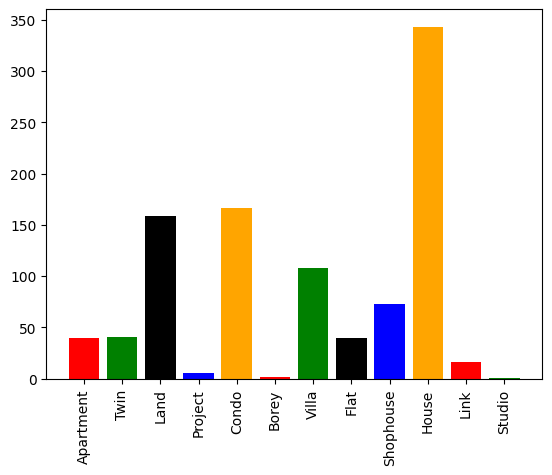

In [7]:
heights = list(realestate_type_counts.values())
bars = realestate_type
y_pos = range(len(bars))
c = ['red', 'green', 'black', 'blue', 'orange']

# Rotation of the bars names
plt.xticks(y_pos, bars,rotation=90)
plt.bar(y_pos, heights,color=c)


## Total realestate_type compare from one to another base in city or province

In [156]:
# function for finding realestate at all locatios
import collections
def count_realestate_and_location(location_name):
    realestate_location_type = {}
    list_realestate = []
    for item in realestate_kh_list:
        if item['location'] == location_name:
            list_realestate.append(item['type'])
    realestate_location_type = {i:list_realestate.count(i) for i in list_realestate}
    if None in realestate_location_type:
        realestate_location_type.pop(None)
    if 'CondoPOA' in realestate_location_type:
        realestate_location_type.pop('CondoPOA')
    if 'Residential Property' in realestate_location_type:
        realestate_location_type.pop('Residential Property')
    if 'LandPOA' in realestate_location_type:
        realestate_location_type.pop('LandPOA')
    if 'Serviced Apartment' in realestate_location_type:
        realestate_location_type.pop('Serviced Apartment')
    for realestate_type_check in realestate_type:

        if realestate_type_check in realestate_location_type.keys():
            pass
        else:
            realestate_location_type[realestate_type_check] =  0
    if realestate_location_type:
        result = []
        for item in realestate_location_type.values():
              result.append(int(item))
        result.insert(0, location_name)
        return result


        
count_realestate_and_location('Phnom Penh')
# realestate_type

['Phnom Penh', 22, 39, 5, 158, 2, 76, 53, 33, 62, 194, 12, 1]

In [157]:
count_realestate_and_location('Kampong Cham')


['Kampong Cham', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [158]:
# get location to list

locationArr = ['Banteay Meanchey','Battambang','Kampong Cham','Kampong Chhnang','Kampong Speu','Kampong Thom','Kampot','Kandal','Koh Kong','Kratié','Mondulkiri','Phnom Penh','Preah Vihear','Prey Veng','Pursat','Ratanakiri','Siem Reap','Preah Sihanouk','Stung Treng','Svay Rieng','Takéo','Oddar Meanchey','Kep','Pailin','Tboung Khmum']
location_count_with_realestate_type = []
for location in locationArr:
    # print("".join(str(count_realestate_and_location(location))))
    data = (count_realestate_and_location(location))
    location_count_with_realestate_type.append(data)
location_count_with_realestate_type

[['Banteay Meanchey', 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Battambang', 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Kampong Cham', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Kampong Chhnang', 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Kampong Speu', 4, 10, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Kampong Thom', 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Kampot', 4, 15, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Kandal', 29, 5, 6, 4, 3, 23, 5, 0, 0, 0, 0, 0],
 ['Koh Kong', 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Kratié', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Mondulkiri', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Phnom Penh', 22, 39, 5, 158, 2, 76, 53, 33, 62, 194, 12, 1],
 ['Preah Vihear', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Prey Veng', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Pursat', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Ratanakiri', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Siem Reap', 3, 37, 77, 14, 3, 4, 2, 0, 0, 0, 0, 0],
 ['Preah Sihanouk', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['Stung Treng', 0, 0, 0,

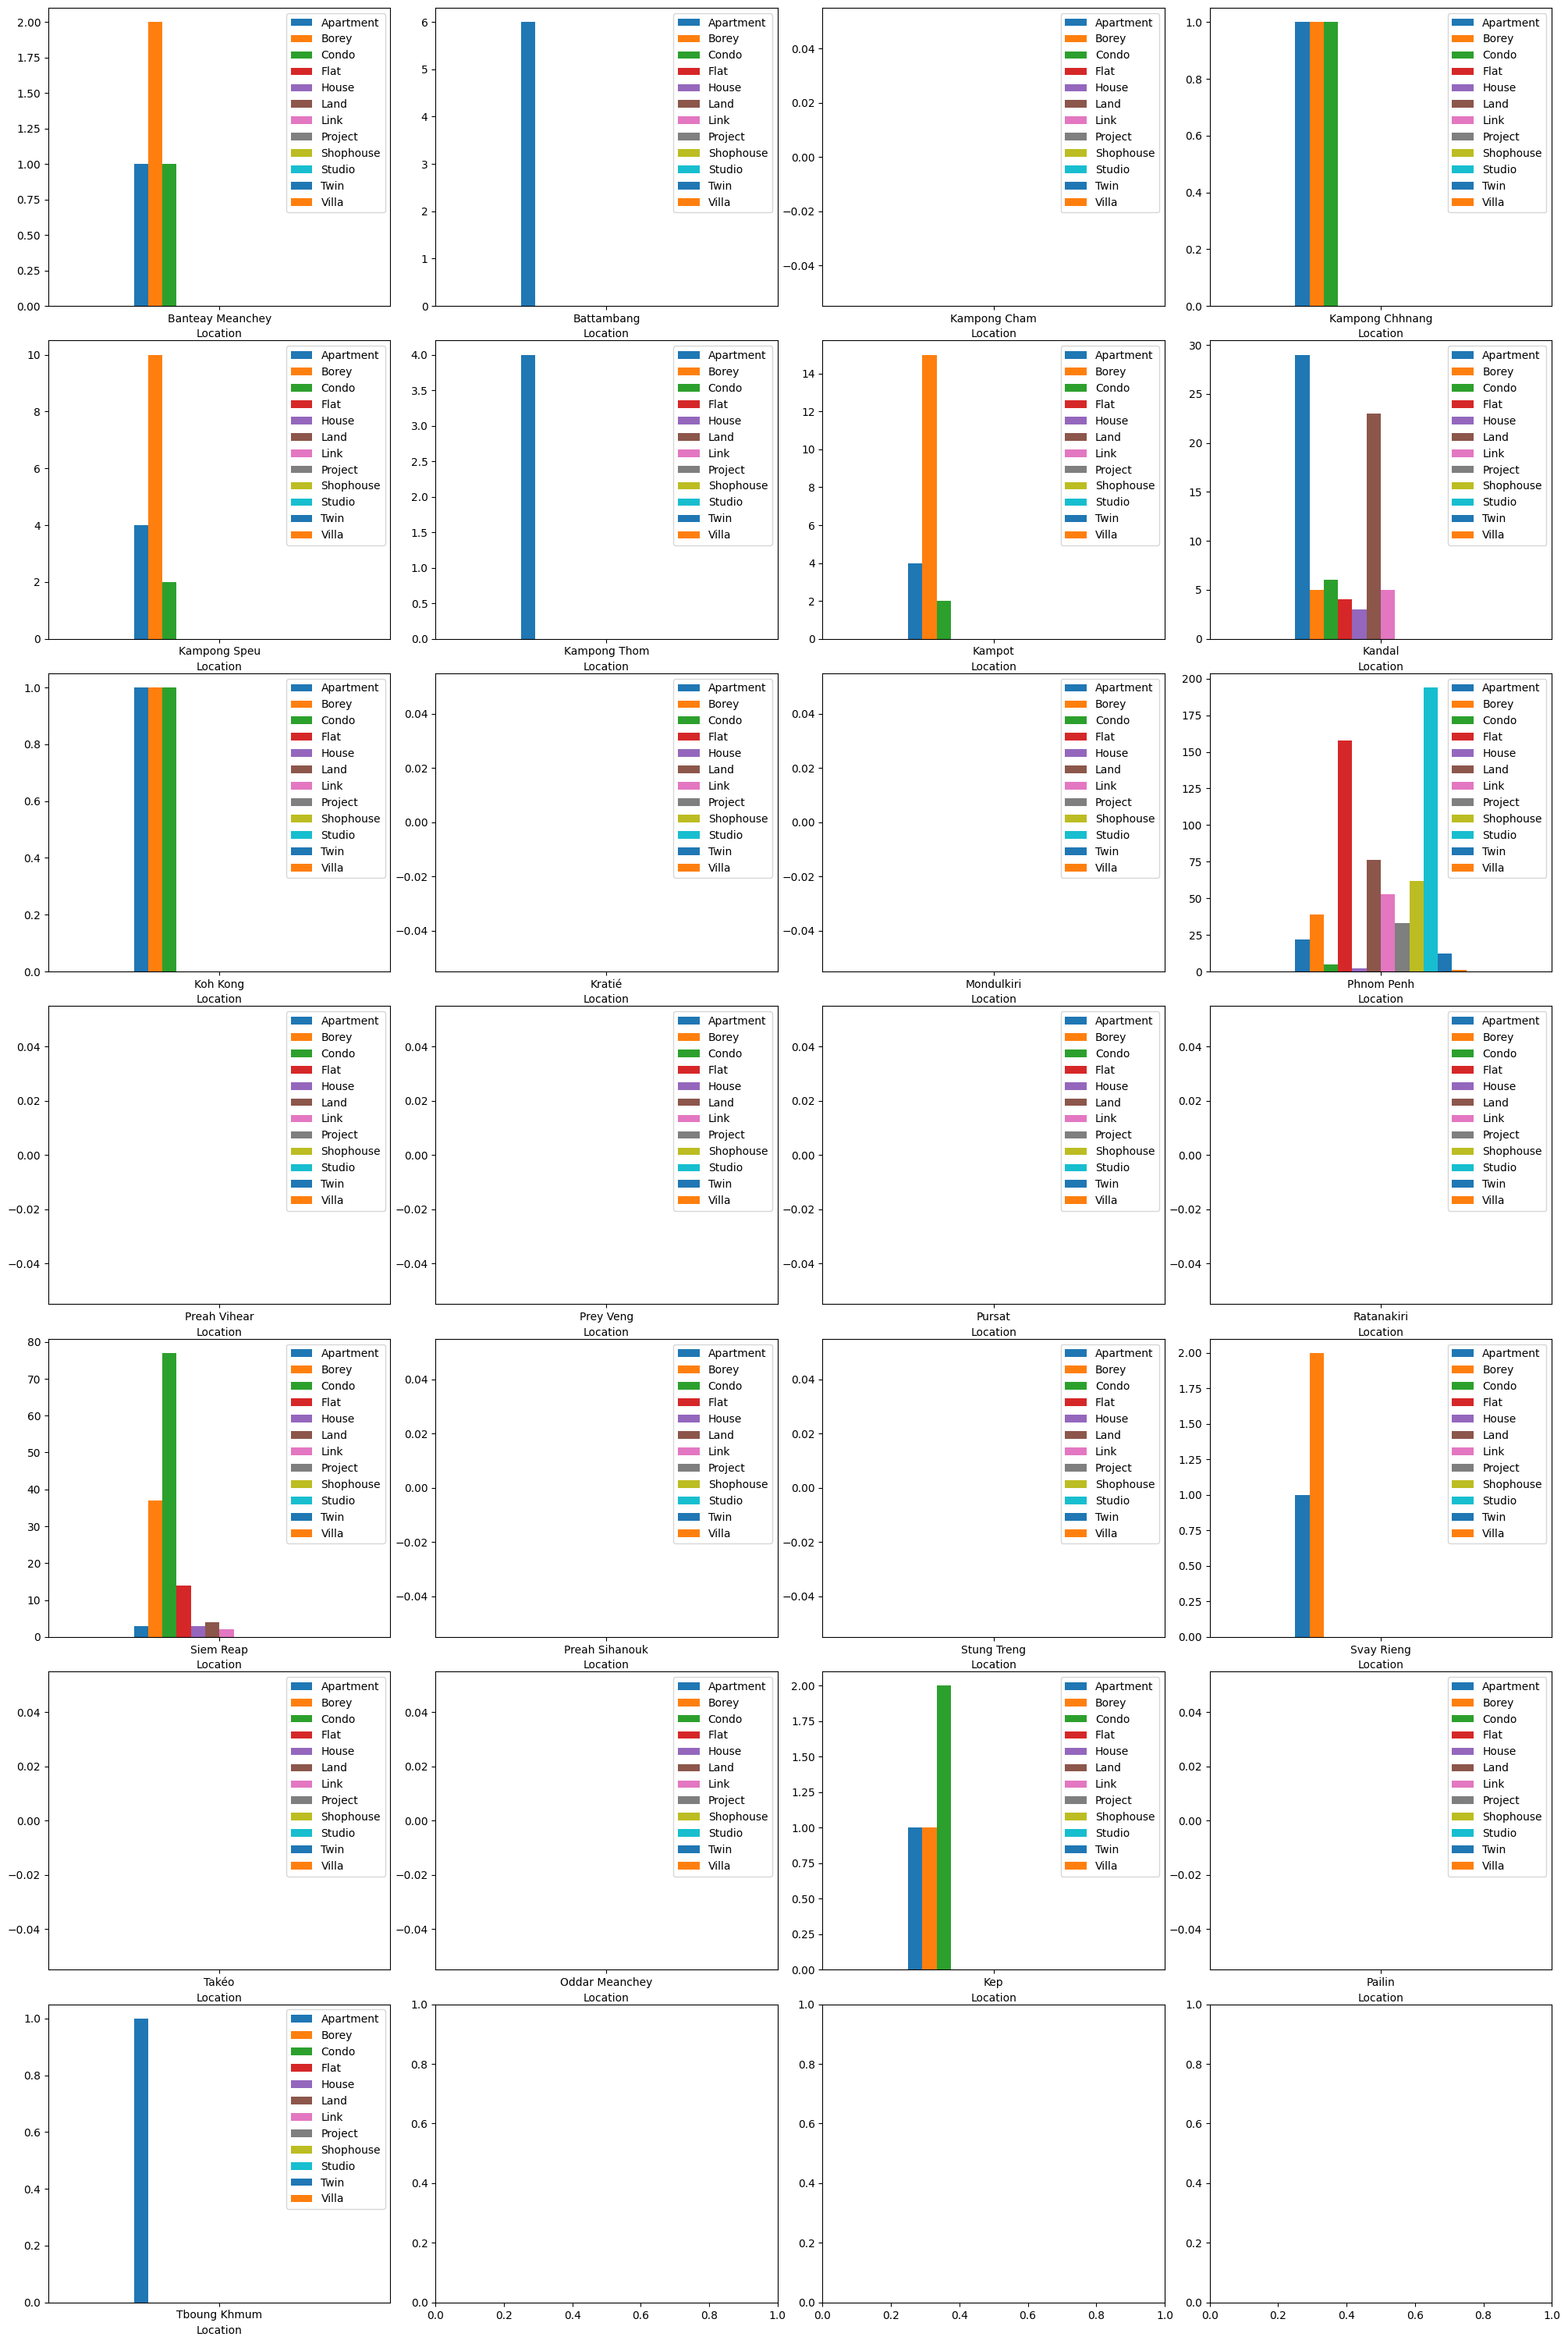

In [220]:
df0=pd.DataFrame([location_count_with_realestate_type[0]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df1=pd.DataFrame([location_count_with_realestate_type[1]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df2=pd.DataFrame([location_count_with_realestate_type[2]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df3=pd.DataFrame([location_count_with_realestate_type[3]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df4=pd.DataFrame([location_count_with_realestate_type[4]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df5=pd.DataFrame([location_count_with_realestate_type[5]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df6=pd.DataFrame([location_count_with_realestate_type[6]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df7=pd.DataFrame([location_count_with_realestate_type[7]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df8=pd.DataFrame([location_count_with_realestate_type[8]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df9=pd.DataFrame([location_count_with_realestate_type[9]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df10=pd.DataFrame([location_count_with_realestate_type[10]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df11=pd.DataFrame([location_count_with_realestate_type[11]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df12=pd.DataFrame([location_count_with_realestate_type[12]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df13=pd.DataFrame([location_count_with_realestate_type[13]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df14=pd.DataFrame([location_count_with_realestate_type[14]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df15=pd.DataFrame([location_count_with_realestate_type[15]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df16=pd.DataFrame([location_count_with_realestate_type[16]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df17=pd.DataFrame([location_count_with_realestate_type[17]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df18=pd.DataFrame([location_count_with_realestate_type[18]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df19=pd.DataFrame([location_count_with_realestate_type[19]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df20=pd.DataFrame([location_count_with_realestate_type[20]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df21=pd.DataFrame([location_count_with_realestate_type[21]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df22=pd.DataFrame([location_count_with_realestate_type[22]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df23=pd.DataFrame([location_count_with_realestate_type[23]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])
df24=pd.DataFrame([location_count_with_realestate_type[24]],columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])


fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 30))
fig.tight_layout()

#add DataFrames to subplots
df0.plot(ax=axes[0,0],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df1.plot(ax=axes[0,1],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df2.plot(ax=axes[0,2],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df3.plot(ax=axes[0,3],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)

df4.plot(ax=axes[1,0],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df5.plot(ax=axes[1,1],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df6.plot(ax=axes[1,2],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df7.plot(ax=axes[1,3],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)

df8.plot(ax=axes[2,0],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df9.plot(ax=axes[2,1],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df10.plot(ax=axes[2,2],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df11.plot(ax=axes[2,3],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)


df12.plot(ax=axes[3,0],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df13.plot(ax=axes[3,1],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df14.plot(ax=axes[3,2],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df15.plot(ax=axes[3,3],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)

df16.plot(ax=axes[4,0],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df17.plot(ax=axes[4,1],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df18.plot(ax=axes[4,2],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df19.plot(ax=axes[4,3],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)

df20.plot(ax=axes[5,0],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df21.plot(ax=axes[5,1],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df22.plot(ax=axes[5,2],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)
df23.plot(ax=axes[5,3],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)

df24.plot(ax=axes[6,0],x="Location",y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",rot=0)

# Show
plt.show()